# ResNet34 using FastAI
* FastAI has been shown to achieve [very high accuracy for FashionMNIST](https://medium.com/@pankajmathur/clothing-categories-classification-using-fast-ai-v1-0-in-10-lines-of-code-4e848797721). We are goinng to reimplement it for the cars dataset.
* Need to install the fastAI library: https://docs.fast.ai/install.html

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.metrics import error_rate

import torch
print('pytorch version: ',torch.__version__)
import fastai
print('fastai version: ',fastai.__version__)

%reload_ext autoreload
%autoreload 2
%matplotlib inline

!pip freeze > './requirements.txt'

pytorch version:  1.1.0
fastai version:  1.0.55.dev0


['Honda Accord Coupe 2012' 'Bentley Continental Flying Spur Sedan 2007' 'Suzuki SX4 Sedan 2012'
 'Maybach Landaulet Convertible 2012' 'Aston Martin V8 Vantage Convertible 2012' 'Honda Odyssey Minivan 2012'
 'Volvo C30 Hatchback 2012' 'Hyundai Azera Sedan 2012' 'Volkswagen Golf Hatchback 2012' 'Toyota Corolla Sedan 2012']


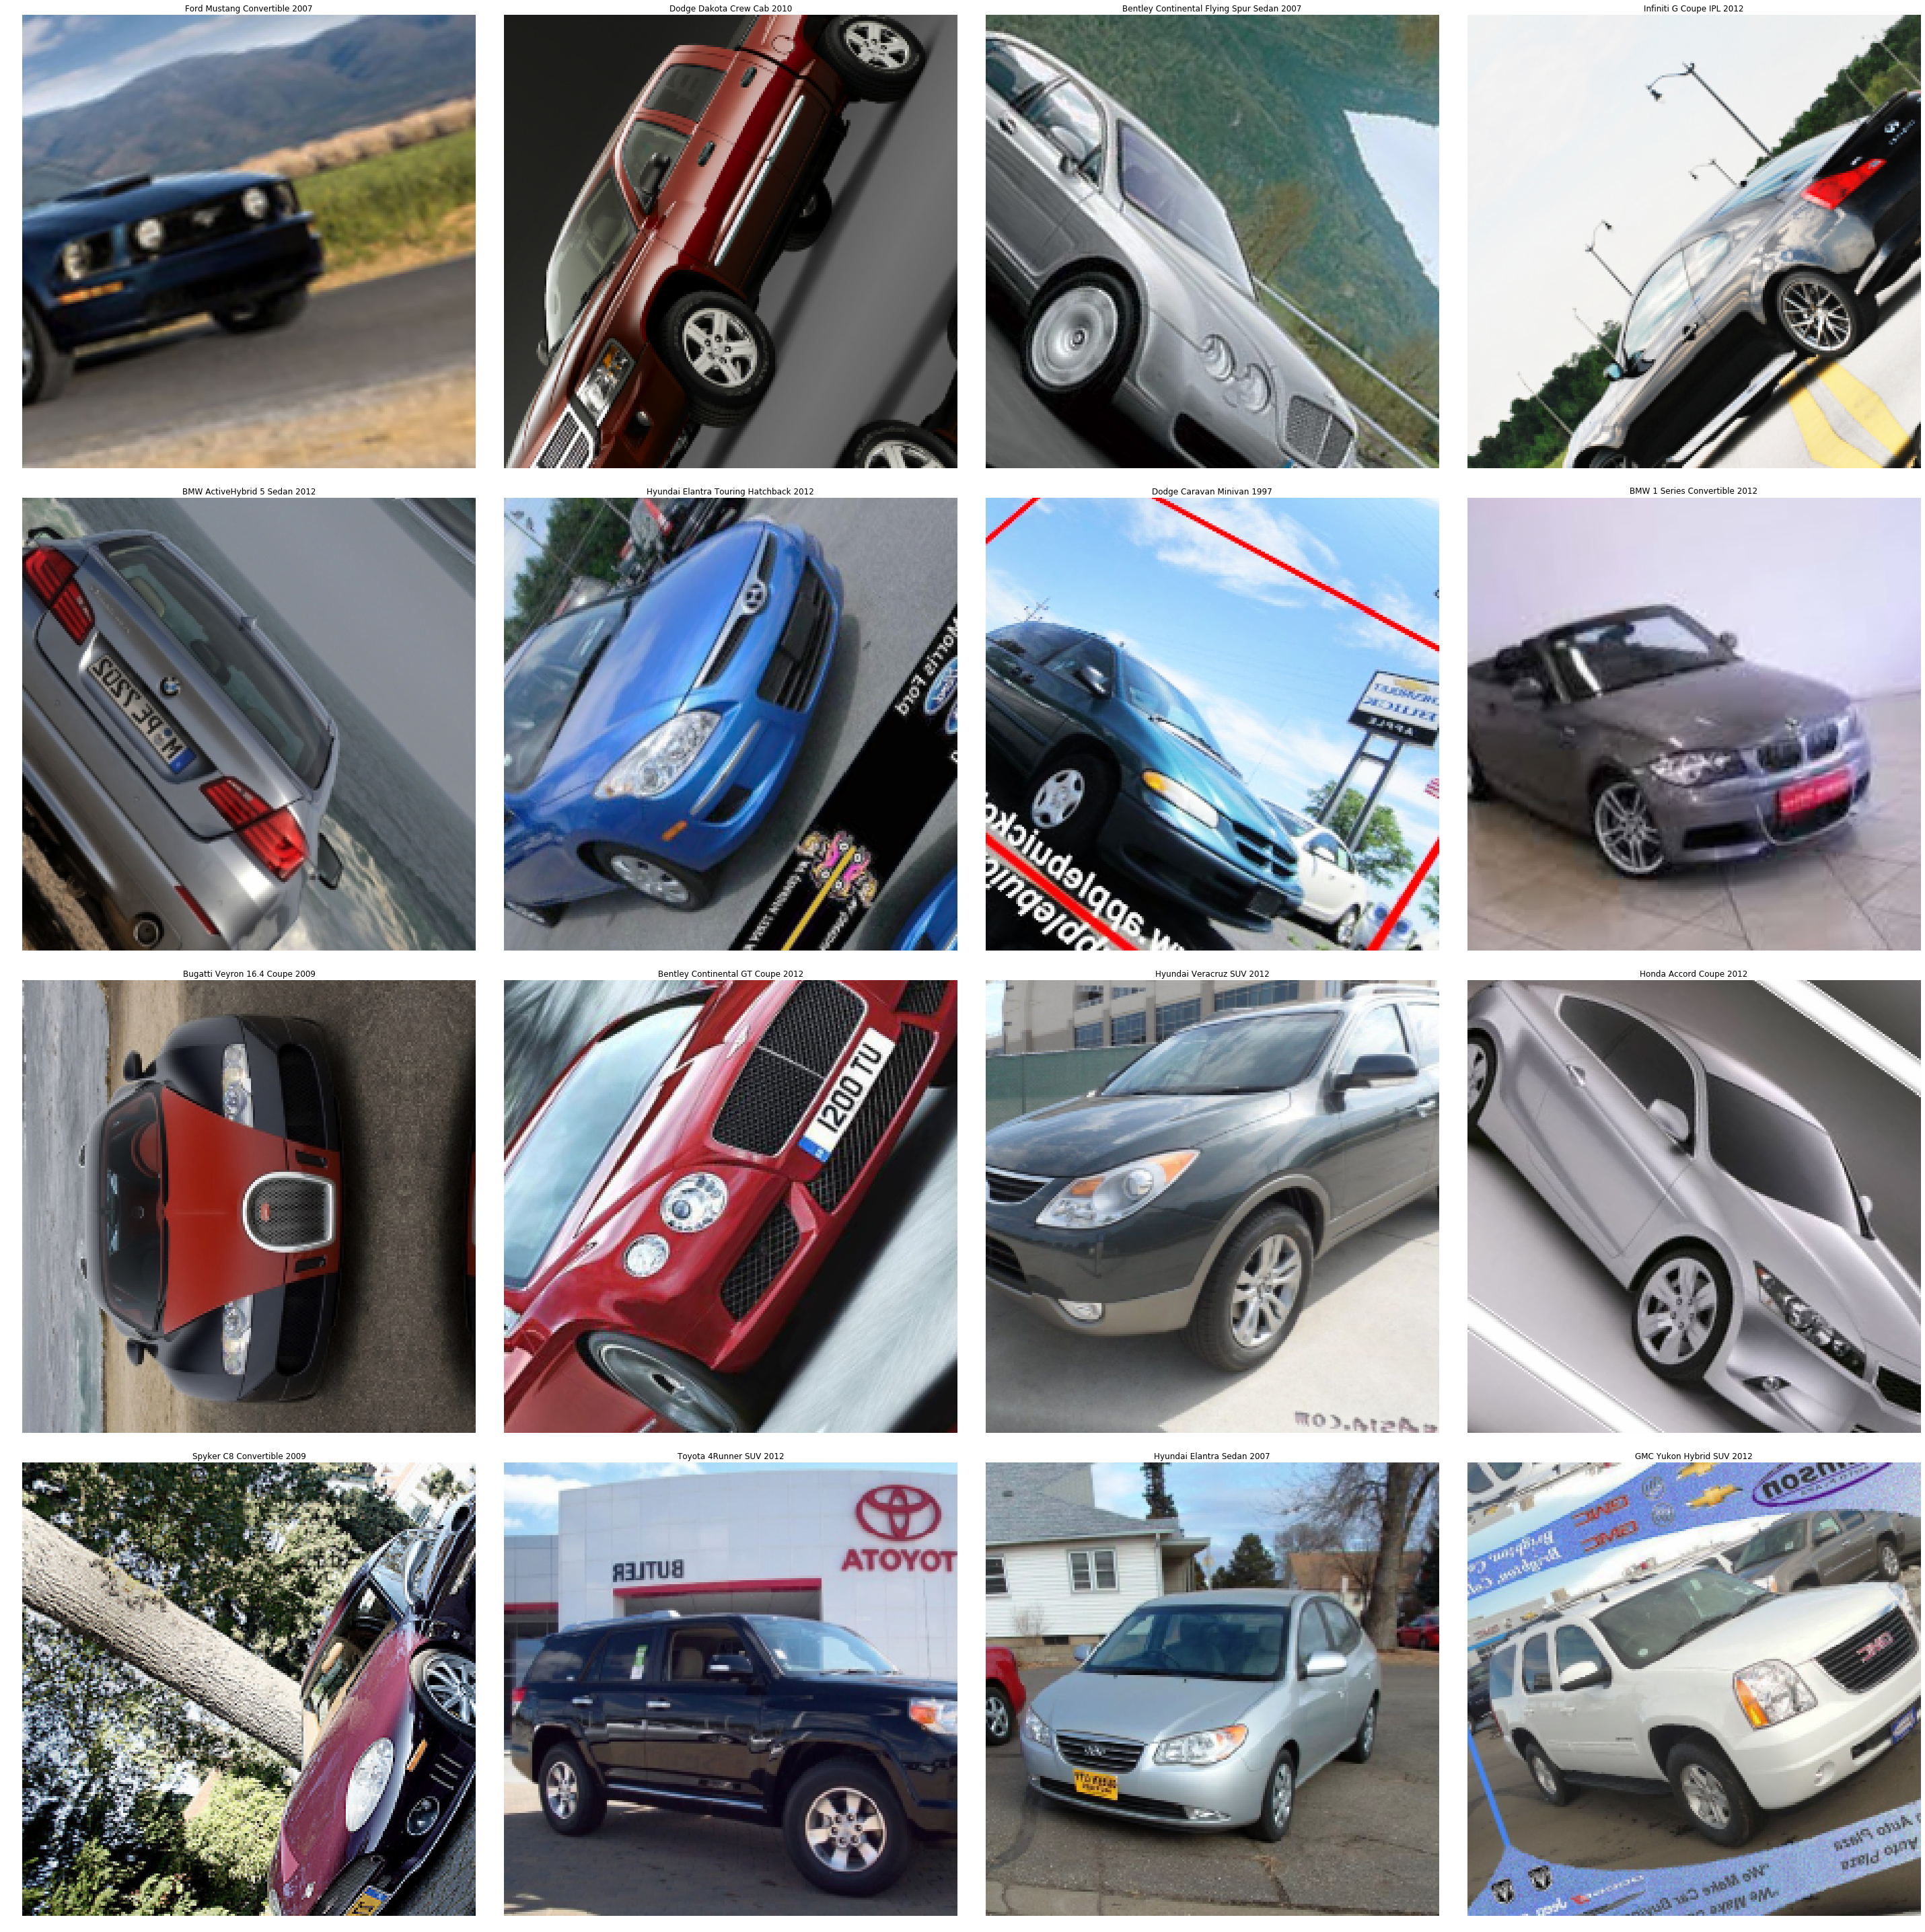

In [19]:
img_dir='data/car_data/train'
path=Path(img_dir)
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2, #percentage to use for the validation set
                                  ds_tfms=get_transforms(do_flip=True,flip_vert=False, max_rotate=90,max_lighting=0.3),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)
print(np.random.choice(data.classes, 10))
data.show_batch(rows=4, figsize=(40,40))

In [15]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="model/")
learn.fit_one_cycle(35)

/Users/kevinsiswandi/dvfp/fastai/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/kevinsiswandi/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:07<00:00, 11639549.91it/s]


The results (65% accuracy) is not too bad, here is the benchmark from the 2013 competition: https://sites.google.com/site/fgcomp2013/results

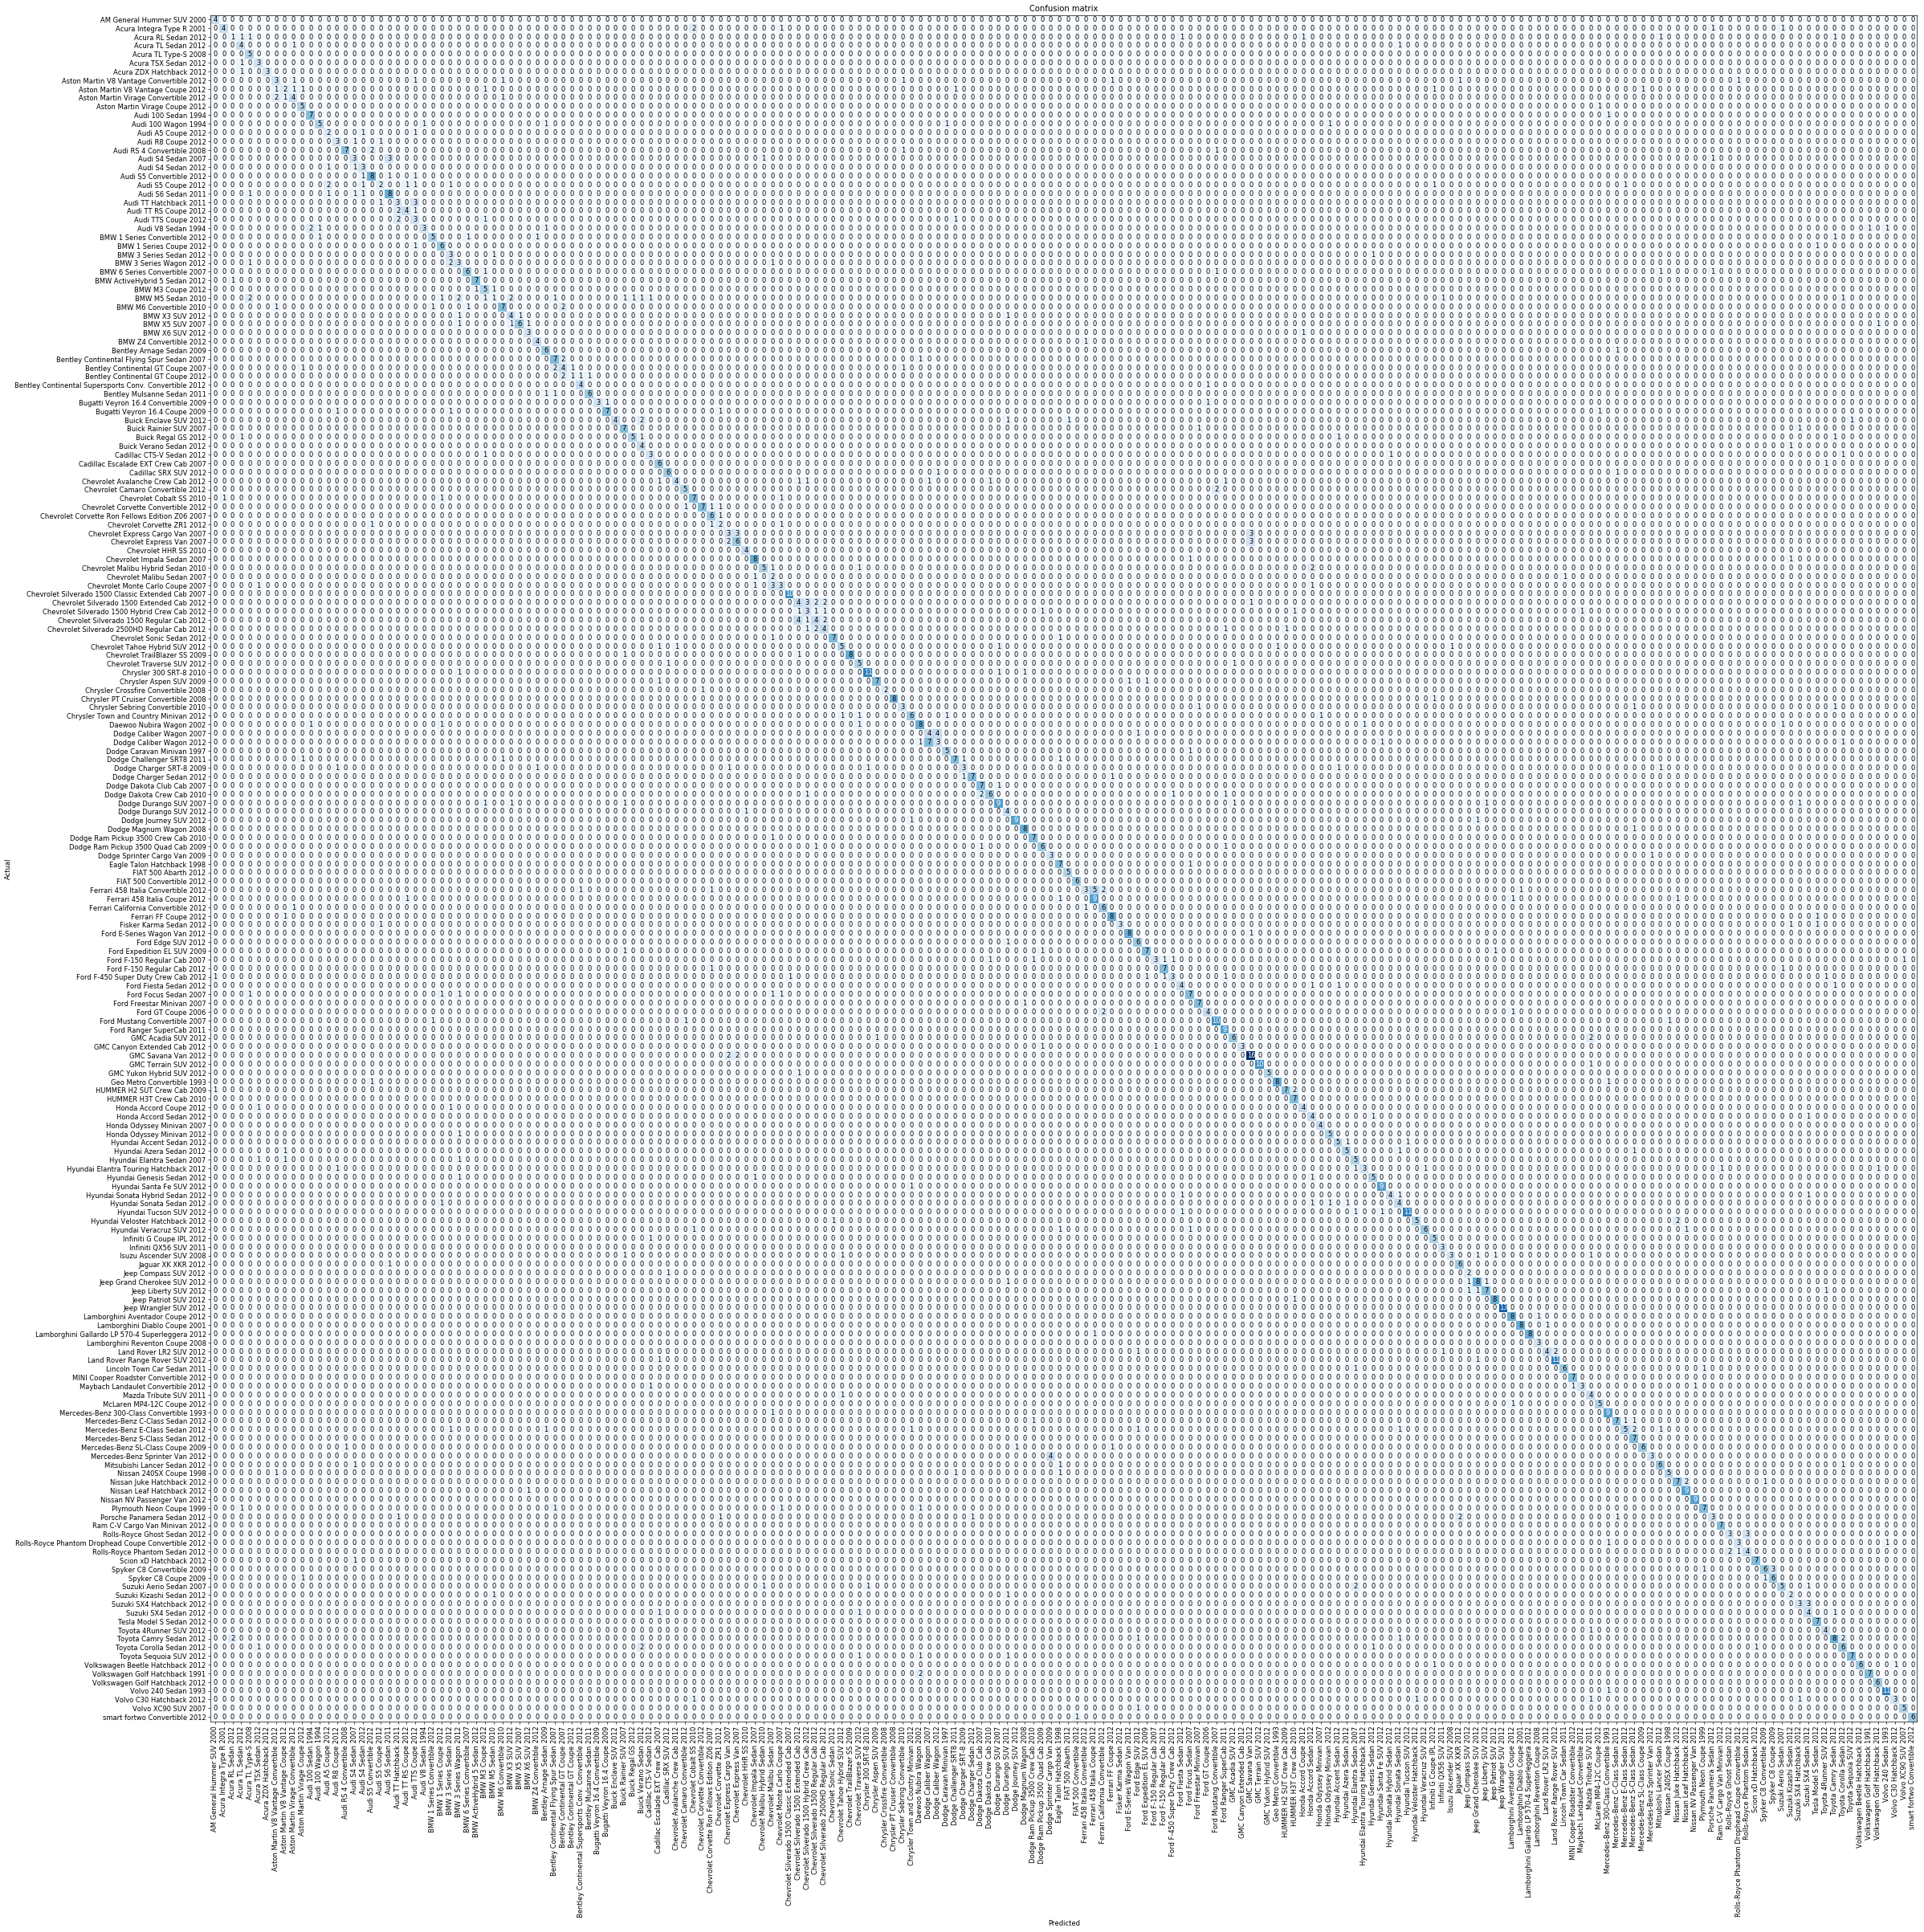

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(40,40), dpi=60)

In [21]:
learn.save('stage-1')
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

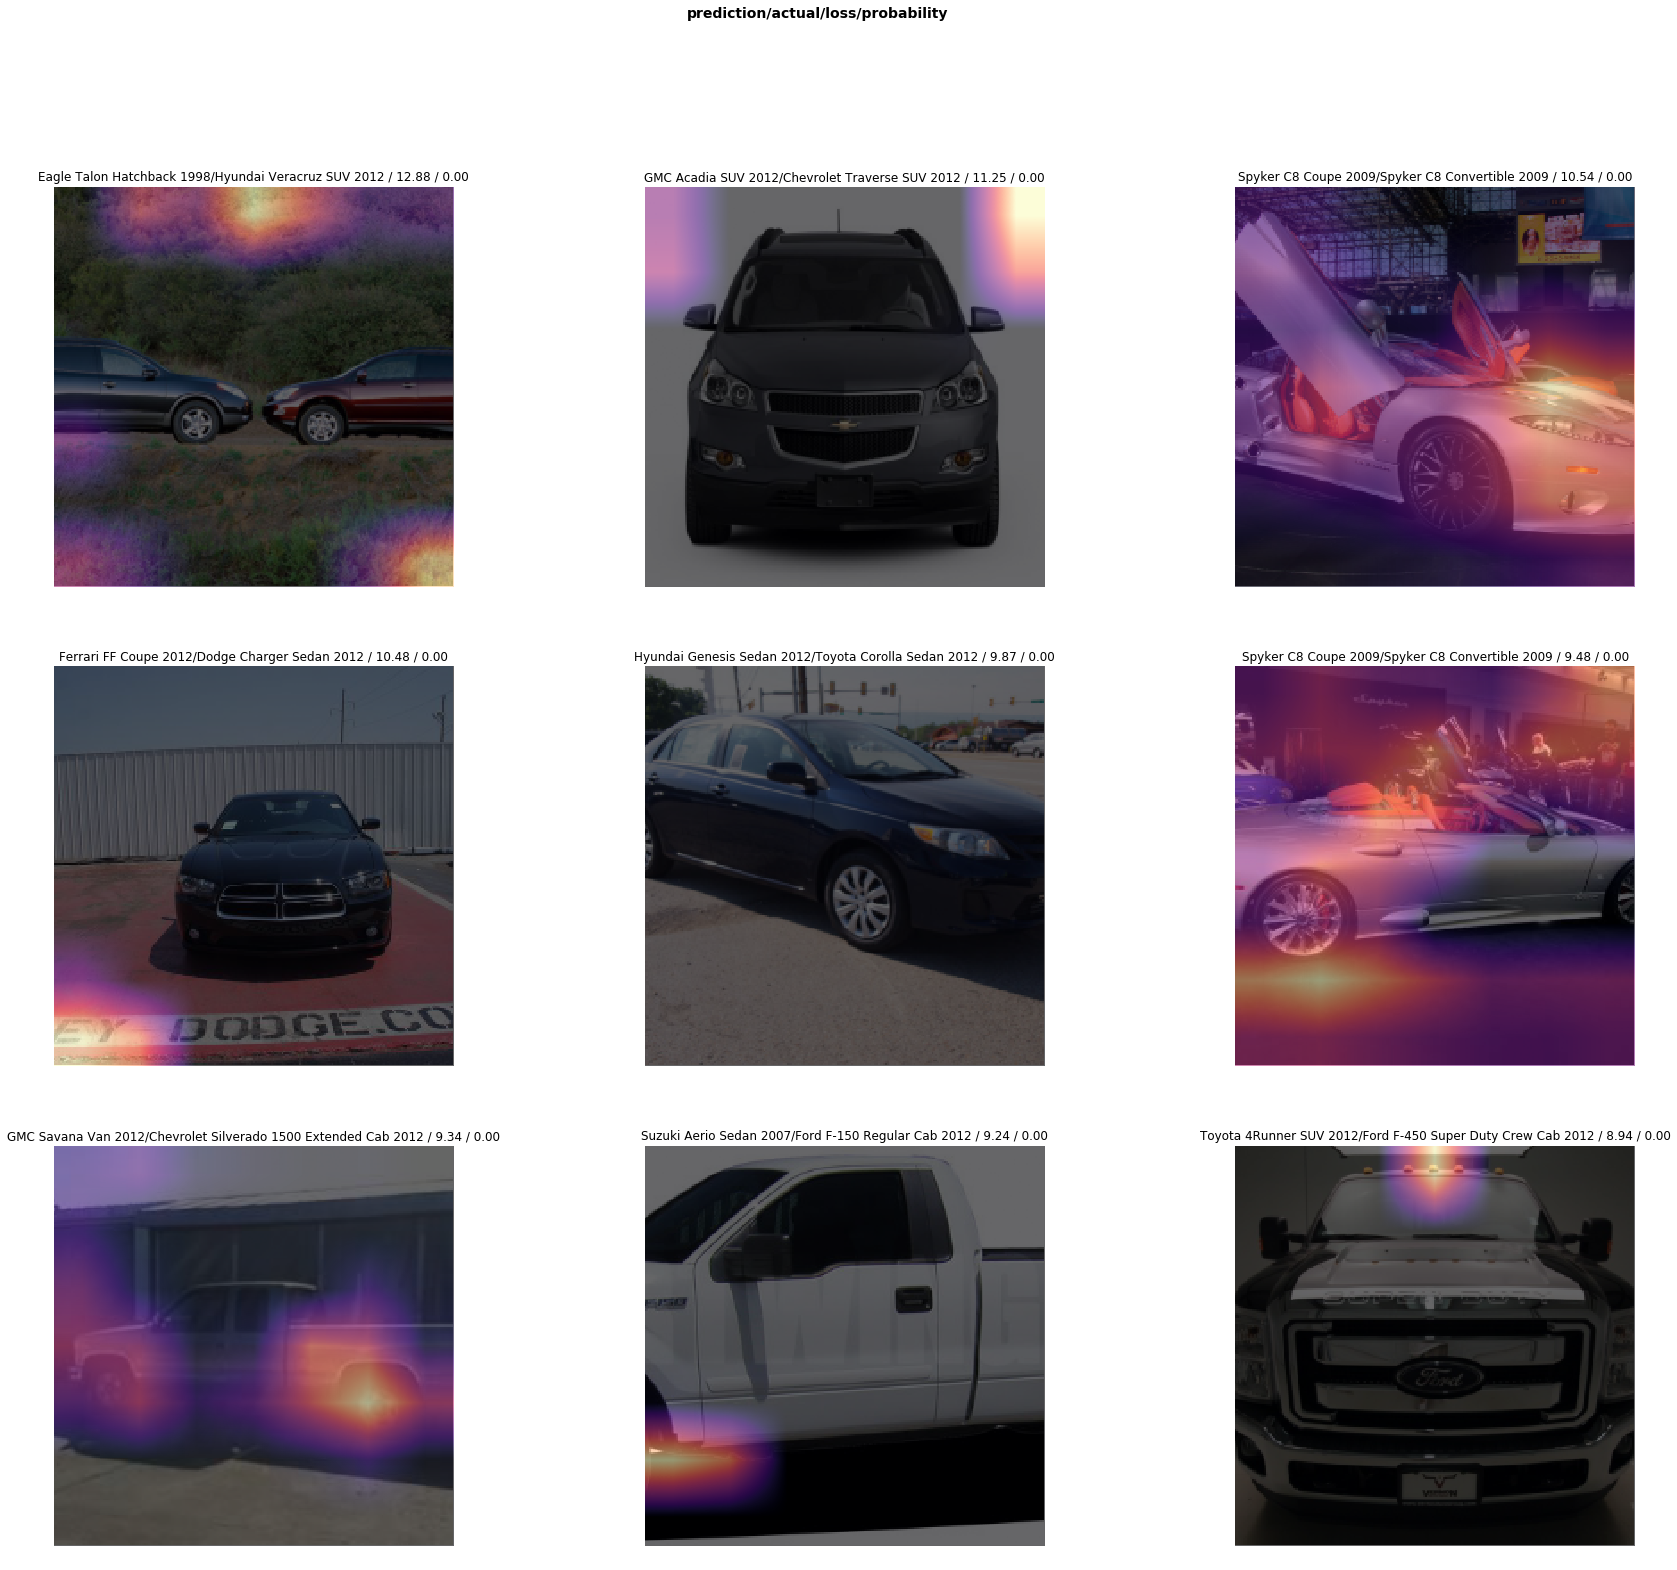

In [22]:
interp.plot_top_losses(9, figsize=(30,25))

In [23]:
interp.most_confused(min_val=2)

[('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 7),
 ('Ferrari 458 Italia Convertible 2012', 'Ferrari 458 Italia Coupe 2012', 5),
 ('Chevrolet Silverado 1500 Regular Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  4),
 ('Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 4),
 ('Mercedes-Benz Sprinter Van 2012', 'Dodge Sprinter Cargo Van 2009', 4),
 ('Audi S4 Sedan 2007', 'Audi S6 Sedan 2011', 3),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 3),
 ('Chevrolet Express Cargo Van 2007', 'Chevrolet Express Van 2007', 3),
 ('Chevrolet Express Cargo Van 2007', 'GMC Savana Van 2012', 3),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 3),
 ('Chevrolet Monte Carlo Coupe 2007', 'Chevrolet Malibu Sedan 2007', 3),
 ('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  3),
 ('Rolls-Royce Ghost Sedan 2012', 'Rolls-Royce Phantom Sedan 2012', 3),
 ('Spyker C8 Convertible 2009', 'Spyker C8 Coupe 2009', 3),
 ('Suzuki SX